<a href="https://colab.research.google.com/github/shrishtinigam/Chronic-Kidney-Disease-Prediction/blob/main/D1_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Convolutional Neural Network on Dataset 1

In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! head dataset_1.csv

Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
80.0,1.02,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.2,1.0,1
50.0,1.02,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
80.0,1.01,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.0,2.5,11.2,6700.0,3.9,1.0,1
80.0,1.01,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.6,0.0,1
90.0,1.015,3.0,0.0,1.0,25.0,1.1,142.0,3.2,12.2,7800.0,4.4,1.0,1
70.0,1.01,0.0,0.0,1.0,54.0,24.0,104.0,4.0,12.4,8406.0,4.71,0.0,1
76.0,1.015,2.0,4.0,1.0,31.0,1.1,137.53,4.63,12.4,6900.0,5.0,0.0,1
100.0,1.015,3.0,0.0,1.0,60.0,1.9,137.53,4.63,10.8,9600.0,4.0,1.0,1


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('dataset_1.csv')

In [ ]:
df.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


In [ ]:
df.shape

(400, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


In [ ]:
df.describe()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


In [ ]:
# Manually normalizing the data -
"""
mean = X.mean(axis=0)
X = X - mean
std = X.std(axis=0)
X = X/std
print(X[:10])
"""
# Scaling dataset using MinMaxScaler and Robust Scaler

# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min

'\nmean = X.mean(axis=0)\nX = X - mean\nstd = X.std(axis=0)\nX = X/std\nprint(X[:10])\n'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [ ]:
X=df.drop(columns='Class',axis=1)
Y=df['Class']
# scaler=StandardScaler()
# scaler=MinMaxScaler(feature_range=(0,1))   
scaler = RobustScaler()  
scaled_X=scaler.fit_transform(X)
scaled_X=pd.DataFrame(scaled_X, columns=X.columns)
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size=0.2,random_state =42)

## Sequential Model in Keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(8,input_dim=len(X_train.columns),activation='relu'))
model.add(Dense(4,activation='relu')) # y = max(0, x)
#model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  # y = 1 / 1+e^ -z

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


Adaptive Moment Estimation is an algorithm for optimization technique for gradient descent. Efficient when working with large problem involving a lot of data or parameters. <br>
Intuitively, it is a combination of the ‘gradient descent with momentum’ algorithm and the ‘RMSP’ algorithm.<br>
rmsprop -> Root Mean Squared Propagation<br>
The binary_crossentropy function computes the cross-entropy loss between true labels and predicted labels<br>

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
# model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

In [ ]:
model.fit(x=X_train,y=Y_train,epochs=256,verbose=1)

Epoch 1/256
10/10 [==============================] - 1s 3ms/step - loss: 0.5929 - accuracy: 0.6062
Epoch 2/256
10/10 [==============================] - 0s 2ms/step - loss: 0.5696 - accuracy: 0.6187
Epoch 3/256
10/10 [==============================] - 0s 2ms/step - loss: 0.5497 - accuracy: 0.6187
Epoch 4/256
10/10 [==============================] - 0s 2ms/step - loss: 0.5307 - accuracy: 0.6187
Epoch 5/256
10/10 [==============================] - 0s 3ms/step - loss: 0.5138 - accuracy: 0.6187
Epoch 6/256
10/10 [==============================] - 0s 2ms/step - loss: 0.4979 - accuracy: 0.6187
Epoch 7/256
10/10 [==============================] - 0s 2ms/step - loss: 0.4822 - accuracy: 0.6219
Epoch 8/256
10/10 [==============================] - 0s 2ms/step - loss: 0.4674 - accuracy: 0.6344
Epoch 9/256
10/10 [==============================] - 0s 2ms/step - loss: 0.4534 - accuracy: 0.7937
Epoch 10/256
10/10 [==============================] - 0s 2ms/step - loss: 0.4400 - accuracy: 0.8531
Epoch 11/

In [ ]:
predicts = model.predict(X_test)

In [ ]:
# Less than 0.5, No. More than 0.5, Yes.
predicts = predicts.round()

In [ ]:
def print_result(data):
  df = pd.DataFrame((np.array(data)).reshape(1,-1), columns=X_train.columns)
  standard_data=scaler.transform(df)
  df = pd.DataFrame(standard_data, columns=X_train.columns)
  predict=model.predict(df)
  if predict==0:
    print("You are healthy")
  else:
    print("You are suffering from Chronic Kidney Disease")

In [ ]:
data=[75,1.01,2,2,1,34,0.4,137.23,4.23,14.6,5000,4.6,1]
print_result(data)
data=[80,1.02,1,0,1,36,1.2,137.53,4.63,15.4,7800,5.2,1]
print_result(data)

You are suffering from Chronic Kidney Disease
You are suffering from Chronic Kidney Disease


In [ ]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
print('Precision: %.3f' % precision_score(Y_test,predicts))
print('Recall: %.3f' % recall_score(Y_test, predicts))
print('Accuracy: %.3f' % accuracy_score(Y_test, predicts))
print('F1-Score: %.3f' % f1_score(Y_test, predicts))

Precision: 1.000
Recall: 1.000
Accuracy: 1.000
F1-Score: 1.000


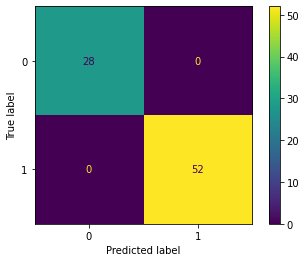

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test, predicts.round())